# Import library, create environment and quick review on the numbers info

In [1]:
#import gym library
import gym
#Import numpy library for data processing
import numpy as np
#Other libraries for display/random/timing purpose
from IPython.display import clear_output
import random
from time import sleep

#Plotting library
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Implement the taxi environment
env = gym.make("Taxi-v3").env

#Quick review on action spaces number and state space number of the environment
print("Number of action:",env.action_space)
print("Number of state for taxi:",env.observation_space)

Number of action: Discrete(6)
Number of state for taxi: Discrete(500)


# Initialize environment, review state 328 for the solution later and render

In [2]:
#Initial the state with the same as instruction (taxi column 3, taxi row 1, passenger location index 0, destination index 2)
state = env.encode(3, 1, 2, 0) 
print("Current state of taxi:", state)

#Set the state = 328 follow the instruction to start with, then render out the visualization
env.s = state
env.render()

Current state of taxi: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



# Investigate the sample of reward table for state 328 for every it's next move (for solution use below)

In [3]:
#View the reward table for state 328 with corresponding move (0->6), each row has an order of 
#[(probability that making the move),(next state),(reward for the move),(is the training done yet ?)]

env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

# Non-reinforcement method to solve the car park problem (random policy)

In [5]:
#Create a 100 times loop of 100 episodes of solving to calculate average total step was made and average penalties 
#to solve the taxi problem

loop_total =[]       #array to store loop number to solve the problem for each iteration of episode
pen_total = []       #array to store penalty time after the problem for each iteration of episode
for i in range(0,100):
    #Initialize loop number (step make) to solve the problem for each time
    loop_numb = 0
    
    #Initialize penalty - reward variable = 0 and done boolean = False
    rw = 0
    pen = 0
    done = False

    #Set initialize state of the environment is 328
    state_numb = 328
    env.s = state_numb
    #While loop with end condition : the problem is solve (done == True) for 1 episode
    while (done != True):
        #Increase a loop counter
        loop_numb += 1

        #Take a random action to perform from 6 defauld actions using action_space.sample()
        #then update the state, reward, done boolean and info variable
        action = env.action_space.sample()
        state, rw, done, info = env.step(action)

        #Increase penalty for wrong pickup/dropoff action (Which has reward = -10)
        if rw == -10:
            pen += 1

        # Collect step frame for later rendering (use if need)
        #step_frame.append({'frame': env.render(mode='ansi') ,'state': state ,'action': action ,'reward': rw})
    
    #Update result of this solving to the array
    #print(i,loop_numb,pen)
    loop_total.append(loop_numb)
    pen_total.append(pen)

#Output of average step and penalty of 100 solving time
print("Average (100 episodes) steps make to solve the problem :",sum(loop_total)/100)
print("Average (100 episodes) penalties (number of incorrect pickup/dropoff):",sum(pen_total)/100)

Average (100 episodes) steps make to solve the problem : 2293.24
Average (100 episodes) penalties (number of incorrect pickup/dropoff): 742.78


# Reinforcement method to solve taxi problem - Q-learning method

1. TRAINING THE Q-TABLE FOR THE OPTIMIZATION TO TAKE THE ACTION FOR EVERY STATES

In [6]:
#Create a table of 0 (which number of row is the state space number (500) 
#and number of column is action number (6))
space_numb = env.observation_space.n    #500
action_numb = env.action_space.n        #6
Qtable = np.zeros([space_numb,action_numb])

In [7]:
#Training step

#array store solvespeed for each training episode for visualization of training process
solvespeed_array =[] 

#Initialize 3 hyperparameter alpha, gamma and epsilon following the standard values from instruction
alpha = 0.1
gamma = 0.6
epsilon = 0.1

#For loop training, update the Q-table through decent episode number (100000 follow the instruction)
for index in range(1,100001):
    #Set initialize state of the environment to be random
    state = env.reset()
    
    #Initialize loop number (step make) to solve the problem for each time
    loop_numb = 0
    
    #Initialize penalty - reward variable = 0 and done boolean = False
    rw = 0
    pen = 0
    done = False
    
    #Solve speed variable to store solve speed of every training episode
    solvespeed = 0
    #While loop with end condition : the problem is solve (done == True) for 1 episode
    while (done != True):
        #Increase a loop counter
        loop_numb += 1
        
        #Draw a random action to exloit the computed Q-value
        #then update the next state it'll take, reward, done boolean and info variable
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(Qtable[state]) # Exploit learned values
        next_state, rw, done, info = env.step(action) 
        
        #Update new Qvalue for an action in the state space using the given formula
        #Q(state,action) ← (1−α)Q(state,action) + α(reward+γmax(a)Q(next state,all actions))
        
        #Qvalue for the state space and taken action
        old_value = Qtable[state, action]  
        
        #next max qvalue for the state space
        next_max = np.max(Qtable[next_state])    
        
        #update the new Qvalue for the cell in table
        new_value = (1 - alpha) * old_value + alpha * (rw + gamma * next_max)    
        Qtable[state, action] = new_value
        
        #Update the solvespeed by 1
        solvespeed+=1
        #Increase penalty for wrong pickup/dropoff action (Which has reward = -10)
        if rw == -10:
            pen += 1
        #Declare the next state after taking the action from current state
        state = next_state
    solvespeed_array.append(solvespeed)
       
print("Done.\n")

Done.



2. Method effectiveness evaluation by apply trained model to solve taxi problem from random state space

In [9]:
loop_total =[]       #array to store loop number to solve the problem for each iteration of episode
pen_total = []       #array to store penalty time after the problem for each iteration of episode

for i in range(0,100):
    #Initialize loop number (step make) to solve the problem for each time
    loop_numb = 0
    
    #Initialize penalty - reward variable = 0 and done boolean = False
    rw = 0
    pen = 0
    done = False
    
    #Create a random state space
    state = env.reset()
    
    while (done != True):
        
        #Take an action with maximum Q-value to perform using np.argmax(Qtable[state])
        #then update the state, reward, done boolean and info variable
        action = np.argmax(Qtable[state])
        state, rw, done, info = env.step(action)
        
        #Increase penalty for wrong pickup/dropoff action (Which has reward = -10)
        if rw == -10:
            pen += 1

        loop_numb += 1

    #Update result of this solving to the array
    #print(i,loop_numb,pen)
    loop_total.append(loop_numb)
    pen_total.append(pen)
    
#Output of average step and penalty of 100 solving time
print("Average (100 episodes) steps make to solve the problem :",sum(loop_total)/100)
print("Average (100 episodes) penalties (number of incorrect pickup/dropoff):",sum(pen_total)/100)
    

Average (100 episodes) steps make to solve the problem : 13.12
Average (100 episodes) penalties (number of incorrect pickup/dropoff): 0.0


3. Learning speed visualization

Text(0, 0.5, 'Total step make for solution')

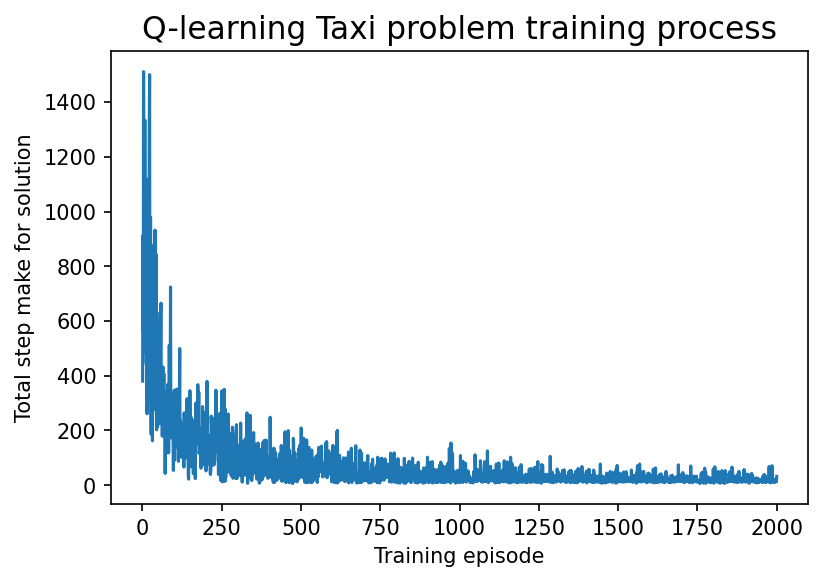

In [10]:
#Create variable x to store training episodes order for the first 2000 episodes (in 100000 episodes total) in our training
x = []
for i in range (1,2001):
    x.append(i)
    
#y is the number of step for successful solve Taxi problem for each episode in our first 2000 episode of training (recorded above)
y = solvespeed_array[0:2000]

#Graph
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
ax.plot(x, y)

#Name the elements
ax.set_title('Q-learning Taxi problem training process', fontsize=15)
ax.set_xlabel('Training episode', fontsize=10)
ax.set_ylabel('Total step make for solution', fontsize=10)

# Apply the TD(0) method for the problem

Reset the Q-table for reuse

In [11]:
space_numb = env.observation_space.n    #500
action_numb = env.action_space.n        #6
Qtable = np.zeros([space_numb,action_numb])

Create an action policy

In [12]:
def policy(state):
    return np.argmax(Qtable[state])

Training step applying the different Q-learning update formula based on TD(0) learning formula

In [13]:
#Array for later evaluation and plotting
TD_solvespeed_array =[]

#For loop training, update the Q-table through 10000 episode
for index in range(10000):
    #Set initialize state of the environment to be random
    state = env.reset()
    
    #Initialize penalty - reward variable = 0 and done boolean = False
    rw = 0
    pen = 0
    done = False
    
    #Storing variable for training evaluation and plotting
    solvespeed =0
    
    #Create a loop
    while (done!=True):        
        #Draw a random action to exloit the computed Q-value
        #then update the next state it'll take, reward, done boolean and info variable
        action = policy(state)
        next_state, rw, done, _ = env.step(action)
        
        #Update the next action using the same policy
        next_action = policy(next_state)
        
        #Update new Qvalue for an action in the state space using the TD(0) learning formula:
        old_value = Qtable[state, action]
        new_value = old_value + alpha*(rw + gamma *Qtable[next_state,next_action] - old_value)    
        Qtable[state, action] = new_value

        #Increase penalty for wrong pickup/dropoff action (Which has reward = -10)
        if rw == -10:
            pen += 1
        #Declare the next state after taking the action from current state
        state = next_state
        
        #Update the sove speed counter
        solvespeed+=1
        
    TD_solvespeed_array.append(solvespeed)
       
print("Done.\n")

Done.



Visualization step

Text(0, 0.5, 'Total step make for solution')

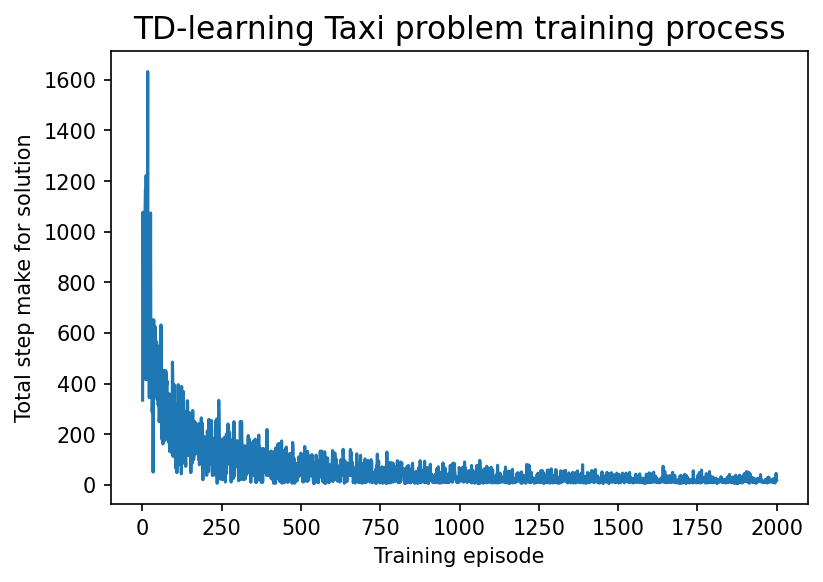

In [14]:
#Create variable x to store training episodes order for the first 2000 episodes in our training (in the range of 10000 episodes)
x = []
for i in range (1,2001):
    x.append(i)
    
#y is the number of step for successful solve Taxi problem for each episode in our first 2000 episodes of training (recorded above)
y = TD_solvespeed_array[0:2000]

#Graph
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
ax.plot(x, y)

#Name the elements
ax.set_title('TD-learning Taxi problem training process', fontsize=15)
ax.set_xlabel('Training episode', fontsize=10)
ax.set_ylabel('Total step make for solution', fontsize=10)